In [1]:
import pandas as pd

# Read in the data from datasets-2019/news/BBCNEWS.2019## folder
# and concatenate them into one dataframe
df = pd.DataFrame()
for i in range(1, 13):
    if i < 10:
        df = pd.concat([df, pd.read_csv('datasets-2019/news/BBCNEWS.20190' + str(i) + '.csv')])
    else:
        df = pd.concat([df, pd.read_csv('datasets-2019/news/BBCNEWS.2019' + str(i) + '.csv')])
        

df.head()

,URL,MatchDateTime,Station,Show,IAShowID,IAPreviewThumb,Snippet
0,https://archive.org/details/BBCNEWS_20190109_1...,1/9/2019 19:45:44,BBCNEWS,Beyond 100 Days,BBCNEWS_20190109_190000_Beyond_100_Days,https://archive.org/download/BBCNEWS_20190109_...,an analysis ofjunked washing machines at a rec...
1,https://archive.org/details/BBCNEWS_20190122_1...,1/22/2019 10:53:21,BBCNEWS,Victoria Derbyshire,BBCNEWS_20190122_100000_Victoria_Derbyshire,https://archive.org/download/BBCNEWS_20190122_...,"dissolve, more methane is being produced. we w..."
2,https://archive.org/details/BBCNEWS_20190115_0...,1/15/2019 2:20:53,BBCNEWS,BBC News,BBCNEWS_20190115_020000_BBC_News,https://archive.org/download/BBCNEWS_20190115_...,large share of antarctica that is at sta ke la...
3,https://archive.org/details/BBCNEWS_20190122_0...,1/22/2019 5:01:55,BBCNEWS,The Briefing,BBCNEWS_20190122_050000_The_Briefing,https://archive.org/download/BBCNEWS_20190122_...,do you think when you are born has any bearing...
4,https://archive.org/details/BBCNEWS_20190122_1...,1/22/2019 19:16:25,BBCNEWS,Beyond 100 Days,BBCNEWS_20190122_190000_Beyond_100_Days,https://archive.org/download/BBCNEWS_20190122_...,is whether this call to arms falls on deaf ear...


In [2]:
# N-gram analysis on Snippet
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# download nltk packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Remove rows with NaN in 'Snippet' column
df = df.dropna(subset=['Snippet'])

# Convert 'Snippet' column to strings in case there are any non-string types (wordnet breaks otherwise)
df['Snippet'] = df['Snippet'].astype(str)

# Remove punctuation
df['Snippet'] = df['Snippet'].str.replace('[{}]'.format(string.punctuation), '')

# Apply the tokenization
df['Snippet'] = df['Snippet'].apply(word_tokenize)

print(df.head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jules\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jules\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jules\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\jules\AppData\Local\Temp\ipykernel_47112\1043563294.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Snippet'] = df['Snippet'].str.replace('[{}]'.format(string.punctuation), '')


                                                 URL       MatchDateTime  \
0  https://archive.org/details/BBCNEWS_20190109_1...   1/9/2019 19:45:44   
1  https://archive.org/details/BBCNEWS_20190122_1...  1/22/2019 10:53:21   
2  https://archive.org/details/BBCNEWS_20190115_0...   1/15/2019 2:20:53   
3  https://archive.org/details/BBCNEWS_20190122_0...   1/22/2019 5:01:55   
4  https://archive.org/details/BBCNEWS_20190122_1...  1/22/2019 19:16:25   

   Station                 Show                                     IAShowID  \
0  BBCNEWS      Beyond 100 Days      BBCNEWS_20190109_190000_Beyond_100_Days   
1  BBCNEWS  Victoria Derbyshire  BBCNEWS_20190122_100000_Victoria_Derbyshire   
2  BBCNEWS             BBC News             BBCNEWS_20190115_020000_BBC_News   
3  BBCNEWS         The Briefing         BBCNEWS_20190122_050000_The_Briefing   
4  BBCNEWS      Beyond 100 Days      BBCNEWS_20190122_190000_Beyond_100_Days   

                                      IAPreviewThumb  \
0  htt

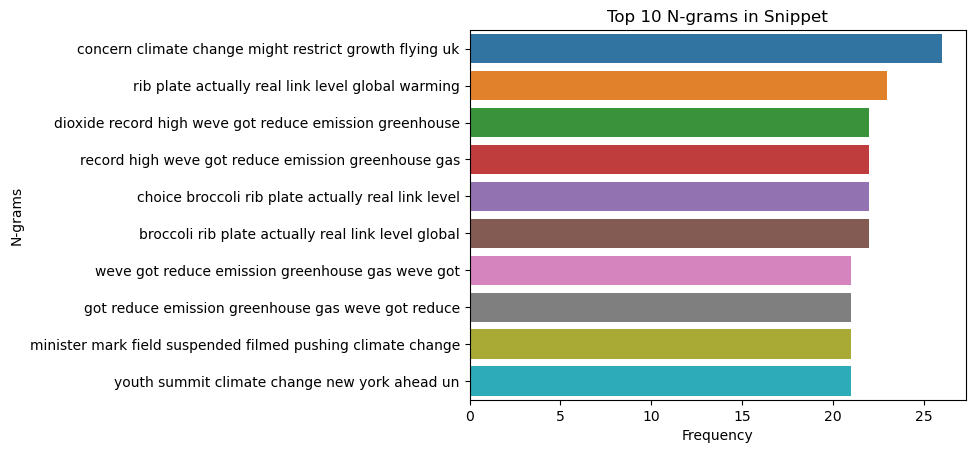

In [3]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
df['Snippet'] = df['Snippet'].apply(lambda x: [item for item in x if item.lower() not in stop_words])

# Lemmatize words
lemmatizer = WordNetLemmatizer()
df['Snippet'] = df['Snippet'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])

# Create n-grams
df['Snippet'] = df['Snippet'].apply(lambda x: [' '.join(ngram) for ngram in nltk.ngrams(x, 8)])

# Flatten the list of n-grams
all_ngrams = [ngram for snippet in df['Snippet'] for ngram in snippet]

# Calculate frequency distribution
ngram_freq = nltk.FreqDist(all_ngrams)

# Get top 10 n-grams
top_ngrams = ngram_freq.most_common(10)

# Plot top 10 n-grams
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(y=[ngram[0] for ngram in top_ngrams], x=[ngram[1] for ngram in top_ngrams])
plt.ylabel('N-grams')
plt.xlabel('Frequency')
plt.title('Top 10 N-grams in Snippet')
plt.show()



In [4]:
print(top_ngrams)

[('concern climate change might restrict growth flying uk', 26), ('rib plate actually real link level global warming', 23), ('dioxide record high weve got reduce emission greenhouse', 22), ('record high weve got reduce emission greenhouse gas', 22), ('choice broccoli rib plate actually real link level', 22), ('broccoli rib plate actually real link level global', 22), ('weve got reduce emission greenhouse gas weve got', 21), ('got reduce emission greenhouse gas weve got reduce', 21), ('minister mark field suspended filmed pushing climate change', 21), ('youth summit climate change new york ahead un', 21)]


In [5]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm.notebook import tqdm
import pandas as pd

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_name = "SamLowe/roberta-base-go_emotions"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)

model.eval()

def classify_emotion(n_gram):
    inputs = tokenizer(n_gram, return_tensors="pt", padding=True, truncation=True).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    predicted_class_idx = torch.argmax(outputs.logits, dim=-1).item()
    predicted_class_label = model.config.id2label[predicted_class_idx]
    return predicted_class_label

sentiments = []

for ngram, count in tqdm(top_ngrams, desc="Classifying"):
    sentiment = classify_emotion(ngram)  # Pass only the n-gram text
    sentiments.append(sentiment)


# Create a DataFrame to store the results.
df_ngrams = pd.DataFrame({
    'N-gram': [ngram for ngram, count in top_ngrams],
    'Count': [count for ngram, count in top_ngrams],
    'Sentiment': sentiments
})

# Display the DataFrame or any other operation you need.
print(df_ngrams)

Classifying:   0%|          | 0/10 [00:00<?, ?it/s]

                                              N-gram  Count Sentiment
0  concern climate change might restrict growth f...     26   neutral
1  rib plate actually real link level global warming     23   neutral
2  dioxide record high weve got reduce emission g...     22   neutral
3  record high weve got reduce emission greenhous...     22   neutral
4  choice broccoli rib plate actually real link l...     22   neutral
5  broccoli rib plate actually real link level gl...     22   neutral
6   weve got reduce emission greenhouse gas weve got     21   neutral
7  got reduce emission greenhouse gas weve got re...     21   neutral
8  minister mark field suspended filmed pushing c...     21   neutral
9      youth summit climate change new york ahead un     21   neutral
